# *Pós-graduação em Ciência e Dados e Machine Learning*
### *Trabalho Final - Machine Learning*

**Disciplina:** Fundamentos de Machine Learning

**Professor:** André Juan Costa Vieira

**Turma:** A

**Nomes dos Integrantes:**

1- Michael Evangelista Negreiro De Matos

2- Rafael Sobral Souza Martins

3- Antônio Conceição Corte Real


## Qualidade de vinhos.

Você foi contratado como cientista de dados pela famosa vinícola **"Vini Tradizionali di Manduria"** para analisar todos os aspectos dos vinhos produzidos. Diversas questões foram levantadas, como: Compreender os padrões das características que proporcionam boas safras e a qualidade de novos vinhos produzidos, antes que a comunidade mundial **"Vins Spectaculaires"** os deguste, apontar quais são os novos **"blends"** que podem ter continuidade no desenvolvimento, dentre várias outras atividades que visam as boas tomadas de decisões, sempre com o intuito de servir os melhores rótulos, aumentando os lucros e diminuindo os gastos.        

A equipe de enólogos faz estudos frequentes para verificar as características de cada vinho, colocando-os em planilhas. Para melhor compreensão dos dados, descreveram o que significado de cada propriedade.   


##### Descrição

**0. Color:** Se o vinho é tinto vermelho ou branco

**1. Fixed Acidity:** Qtd.de Ácido não volátil, aquele que não evapora fácil

**2. Volatile Acidity:** Teor de ácido acético que leva a um sabor desagradável de vinagre

**3. Citric Acid:** Um tipo de ácido que age como conservante para aumentar o nível de acidez em pequena quantidade para adicionar aroma e sabor

**4. Residual Sugar:** Qtd. de açúcar restante depois da fermentação, mais de 45g/litro é doce

**5. Chlorides:** Qtd. de sal

**6. Free Sulfur Dioxide:** Componente que impede crescimento microbiano e a oxidação do vinho

**7. Total Sulfur Dioxide:** Qtd. de SO2 (dióxido de enxofre)

**8. Density:** Densidade do vinho,

**9. pH:** Nível de acidez ou potencial hidrogeniônico

**10. Sulphates:** Um adicional que contribui para níveis de SO2 e é
antimicróbico e antioxidante

**11. Alcohol:** Qtd. de álcool

**12. Qualidade:** Notas de 3 a 9

# Questões

### Importe todas as bibliotecas necessárias na célula abaixo
##### Organize-as de forma crescente em relação ao tamanho da frase

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
import plotly.express as px
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, IsolationForest
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, silhouette_score, classification_report,confusion_matrix

### Tratamento dos Dados


Sir. Pounce, enólogo de longa data, especializado em vinhos italianos, descobriu que estão faltando alguns valores nas planilhas, e que outros dados foram alterados pelo ex-funcionário Smeagle, dispensado por degustar vinhos 'preciosos'.   

**Utilize o dataset 'wines_preprocessing.csv' para fazer as questões abaixo.**

1- Busque os valores faltantes no dataset e trate-os.

2- Busque valores incongruentes no dataset, imprima e os trate.

3- Valide seus tratamentos com o dataset **'wines.csv'**, demonstrando se foi possível manter as distribuições de forma adequada.

In [ ]:
#Como foi instruído ler "wines_preprocessing.csv" e o arquivo nos passado se chama "wines_pre_processing.csv", é recomendado renomea-lo para que não der erro!
df = pd.read_csv('wines_preprocessing.csv')

In [ ]:
df.head()

,Unnamed: 0,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99,3.28,0.51,13.4,6
1,1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.4,0.75,9.8,5
2,2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.9898,3.28,0.36,12.7,9
3,3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.9962,3.42,0.4,9.3,7
4,4,white,7.1,0.2,0.34,16.0,0.05,51.0,166.0,0.9985,3.21,0.6,9.2,6


In [ ]:
df.describe()

,Unnamed: 0
count,6497.000000
mean,3248.000000
std,1875.666681
min,0.000000
25%,1624.000000
50%,3248.000000
75%,4872.000000
max,6496.000000


In [ ]:
# Dropar a coluna que parece ser ID, mas mesmo se não fosse, eu não tenho ideia do que se trata então uma abordagem correta seria dropa-la
df = df.drop(columns=['Unnamed: 0'])
print(df.dtypes)

color                   object
fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object


In [ ]:
# Feito ao perceber que as colunas floats estavam todas como objects, poderia atrapalhar processos lá na frente
colunas_float = [col for col in df.select_dtypes(include=['object']).columns if col != 'color']

df[colunas_float] = df[colunas_float].apply(pd.to_numeric, errors='coerce')

print(df.dtypes)

color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6479.000000,6484.000000,6482.000000,6484.000000,6479.000000,6484.000000,6485.000000,6485.000000,6484.000000,6480.000000,6482.000000,6492.000000
mean,7.215720,0.339736,0.318564,5.446653,0.056057,30.527298,115.763685,0.994697,3.218489,0.531369,10.491628,5.818238
std,1.296388,0.164756,0.145237,4.760773,0.035070,17.745948,56.545574,0.003000,0.160816,0.148801,1.192386,0.873048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
valores_nulos = df.isnull().sum()

# Exibindo a contagem de valores faltantes
print(valores_nulos)

valores_nulos_df = pd.DataFrame(valores_nulos, columns=['Valores Nulos'])

color                    3
fixed acidity           18
volatile acidity        13
citric acid             15
residual sugar          13
chlorides               18
free sulfur dioxide     13
total sulfur dioxide    12
density                 12
pH                      13
sulphates               17
alcohol                 15
quality                  5
dtype: int64


In [ ]:
# Função para preencher valores faltantes (Método adotado pelo fato de terem poucas colunas com valores nulos, então o risco de enviezar o resultado caso fosse feita uma predição é minimo)
# Existem outras abordagens como dropar a linha e afins, mas como o wines para comparação tem a mesma quantidade de linhas do original, optei por não dropa-las, outra boa opção seria pegar a media.
def preencher_valores_nulos_com_media_moda(df):
    # Preencher colunas de tipo float com a mediana
    float_cols = df.select_dtypes(include=['float64']).columns
    for col in float_cols:
      df[col].fillna(df[col].median(), inplace=True)

    # Preencher colunas de tipo object com a moda
    object_cols = df.select_dtypes(include=['object']).columns
    for col in object_cols:
      df[col].fillna(df[col].mode()[0], inplace=True)

    return df

df_tratada = preencher_valores_nulos_com_media_moda(df)

valores_nulos = df_tratada.isnull().sum()
print(valores_nulos)


color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#Verificando os valores únicos da coluna color
cores_diferentes = df['color'].unique()
print(cores_diferentes)

['white' 'red' 'dois' 'leonidas, para te arrumar essas "confusão"' 'amo'
 'vinho ruim' 'deep learning' 'my precious' 'vai dar não' 'bart' 'ml']


In [ ]:
#Verificando a quantidade de dados completramente fora do esperado existentes, isso é basicamente para me ajudar a escolher uma forma de tratar a coluna
contagens_cores = df['color'].value_counts()

print(contagens_cores)

color
white                                         4890
red                                           1596
dois                                             2
ml                                               2
leonidas, para te arrumar essas "confusão"       1
amo                                              1
vinho ruim                                       1
deep learning                                    1
my precious                                      1
vai dar não                                      1
bart                                             1
Name: count, dtype: int64


In [ ]:
#Considerando a baixa quantidade de dados fora do esperado, vou substituir os resultados que não fazem sentido pela moda, ou seja todos os que não são white ou red.
#Tem outras abordagens, mas considerando a alta quantidade de dados white em comparação a red, e a quantidade quase nula de outros valores, usar a abordagem de moda
#seria uma maneira rápida de resolver o problema com impactos mínimo/nulo na database.
moda_color = df['color'].mode()[0]

df['color'] = df['color'].apply(lambda x: moda_color if x not in ['white', 'red'] else x)

print(df['color'].value_counts())

color
white    4901
red      1596
Name: count, dtype: int64


In [ ]:
#Conferindo as demais colunas para ver ser não tem valores aleátorios
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

color: ['white' 'red']
fixed acidity: [ 6.6   6.9   6.7   7.1   8.3   8.    6.   11.9   6.8   7.7  11.5   7.3
  6.4   7.6   5.8  10.2   5.1   7.5   7.9  10.4   6.1   5.6  10.    7.2
 12.5   8.4   5.9   8.5  10.6   7.8   5.4   6.5   6.3  14.3   8.7   5.7
  5.3   7.    9.    8.8   6.2  12.3   7.4   8.2   8.1   9.8   8.6  10.3
  9.6   9.3   8.9   5.2  15.5   9.5   9.2  12.7  11.6   5.    9.9   4.5
  9.1  11.8  11.4  11.2  14.   10.9   3.9  10.1  15.    4.8   5.5   9.4
 12.2   9.7   4.6  13.7   4.7  12.6  10.5  12.   11.3  12.9  12.4  12.8
 11.1  10.7  15.6  13.2  11.7  11.   10.8   4.4   4.9  12.1  15.9   6.15
 13.3  14.2   7.15 13.4  13.    4.2   6.45 13.8   3.8  13.5 ]
volatile acidity: [0.42  0.63  0.36  0.11  0.2   0.3   0.715 0.28  0.39  0.33  0.18  0.26
 0.16  0.38  0.34  0.19  0.23  0.29  0.21  0.66  0.37  0.24  0.32  0.44
 0.49  0.58  0.43  0.46  0.53  0.185 0.7   0.35  0.22  0.17  0.27  0.41
 0.4   0.55  0.56  0.31  0.14  0.615 0.13  0.685 0.15  0.745 0.25  1.025
 0.88  1.    0.4

In [ ]:
#Verificando os valores da tabela quality, passa-lá para inteiro é mais prudente, e isso valida a abordagem de usar a substituição de mediana ao invés da média
# que possívelmente traria um resultado float para uma tabela que é de inteiros.
df['quality'] = df['quality'].astype('int64')

for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

color: ['white' 'red']
fixed acidity: [ 6.6   6.9   6.7   7.1   8.3   8.    6.   11.9   6.8   7.7  11.5   7.3
  6.4   7.6   5.8  10.2   5.1   7.5   7.9  10.4   6.1   5.6  10.    7.2
 12.5   8.4   5.9   8.5  10.6   7.8   5.4   6.5   6.3  14.3   8.7   5.7
  5.3   7.    9.    8.8   6.2  12.3   7.4   8.2   8.1   9.8   8.6  10.3
  9.6   9.3   8.9   5.2  15.5   9.5   9.2  12.7  11.6   5.    9.9   4.5
  9.1  11.8  11.4  11.2  14.   10.9   3.9  10.1  15.    4.8   5.5   9.4
 12.2   9.7   4.6  13.7   4.7  12.6  10.5  12.   11.3  12.9  12.4  12.8
 11.1  10.7  15.6  13.2  11.7  11.   10.8   4.4   4.9  12.1  15.9   6.15
 13.3  14.2   7.15 13.4  13.    4.2   6.45 13.8   3.8  13.5 ]
volatile acidity: [0.42  0.63  0.36  0.11  0.2   0.3   0.715 0.28  0.39  0.33  0.18  0.26
 0.16  0.38  0.34  0.19  0.23  0.29  0.21  0.66  0.37  0.24  0.32  0.44
 0.49  0.58  0.43  0.46  0.53  0.185 0.7   0.35  0.22  0.17  0.27  0.41
 0.4   0.55  0.56  0.31  0.14  0.615 0.13  0.685 0.15  0.745 0.25  1.025
 0.88  1.    0.4

In [ ]:
#Comparação de Describe - DF Gabarito
df_para_comparacao = pd.read_csv("wines.csv")
df_para_comparacao.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#Comparação de Describe - Nosso DF
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215122,0.339637,0.318544,5.441758,0.056032,30.524242,115.767816,0.994697,3.218472,0.531313,10.491185,5.818378
std,1.294640,0.164606,0.145070,4.757263,0.035024,17.728313,56.493403,0.002997,0.160655,0.148611,1.191044,0.872726
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.500000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#Comparação de Valores Únicos Color - DF Gabarito
df_para_comparacao['color'].unique()

array(['white', 'red'], dtype=object)

In [ ]:
#Comparação de Valores Únicos Color - Nossa DF
df['color'].unique()

array(['white', 'red'], dtype=object)

In [ ]:
#Comparação de Valores Nulos - DF Gabarito
df_para_comparacao.isnull().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Comparação de Valores Nulos - Nossa DF
df.isnull().sum()

color                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Comparação de Tipos - DF Gabarito
df_para_comparacao.dtypes

color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#Comparação de Tipos - Nossa DF
df.dtypes

color                    object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#Comparação de Valores Únicos - DF Gabarito
for column in df_para_comparacao.columns:
    unique_values = df_para_comparacao[column].unique()
    print(f'{column}: {unique_values}')

color: ['white' 'red']
fixed acidity: [ 6.6   6.9   6.7   7.1   8.3   8.    6.   11.9   6.8   7.7  11.5   7.3
  6.4   7.6   5.8  10.2   5.1   7.5   7.9  10.4   6.1   5.6  10.    7.2
 12.5   8.4   5.9   8.5  10.6   7.8   5.4   6.5   6.3  14.3   8.7   5.7
  5.3   7.    9.    8.8   6.2  12.3   7.4   8.2   8.1   9.8   8.6  10.3
  9.6   9.3   8.9   5.2  15.5   9.5   9.2  12.7  11.6   5.    9.9   4.5
  9.1  11.8  11.4  11.2  14.   10.9   3.9  10.1  15.    4.8   5.5   9.4
 12.2   9.7   4.6  13.7   4.7  12.6  10.5  12.   11.3  12.9  12.4  12.8
 11.1  10.7  15.6  13.2  11.7  11.   10.8   4.4   4.9  12.1  15.9   6.15
 13.3  14.2   7.15 13.4  13.    4.2   6.45 13.8   3.8  13.5 ]
volatile acidity: [0.42  0.63  0.36  0.11  0.2   0.3   0.715 0.28  0.39  0.33  0.18  0.26
 0.16  0.38  0.34  0.19  0.23  0.29  0.21  0.66  0.37  0.24  0.32  0.44
 0.49  0.58  0.43  0.46  0.53  0.185 0.7   0.35  0.22  0.17  0.27  0.41
 0.4   0.55  0.56  0.31  0.14  0.615 0.13  0.685 0.15  0.745 0.25  1.025
 0.88  1.    0.4

In [ ]:
#Comparação de Valores Únicos - Nossa DF
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

color: ['white' 'red']
fixed acidity: [ 6.6   6.9   6.7   7.1   8.3   8.    6.   11.9   6.8   7.7  11.5   7.3
  6.4   7.6   5.8  10.2   5.1   7.5   7.9  10.4   6.1   5.6  10.    7.2
 12.5   8.4   5.9   8.5  10.6   7.8   5.4   6.5   6.3  14.3   8.7   5.7
  5.3   7.    9.    8.8   6.2  12.3   7.4   8.2   8.1   9.8   8.6  10.3
  9.6   9.3   8.9   5.2  15.5   9.5   9.2  12.7  11.6   5.    9.9   4.5
  9.1  11.8  11.4  11.2  14.   10.9   3.9  10.1  15.    4.8   5.5   9.4
 12.2   9.7   4.6  13.7   4.7  12.6  10.5  12.   11.3  12.9  12.4  12.8
 11.1  10.7  15.6  13.2  11.7  11.   10.8   4.4   4.9  12.1  15.9   6.15
 13.3  14.2   7.15 13.4  13.    4.2   6.45 13.8   3.8  13.5 ]
volatile acidity: [0.42  0.63  0.36  0.11  0.2   0.3   0.715 0.28  0.39  0.33  0.18  0.26
 0.16  0.38  0.34  0.19  0.23  0.29  0.21  0.66  0.37  0.24  0.32  0.44
 0.49  0.58  0.43  0.46  0.53  0.185 0.7   0.35  0.22  0.17  0.27  0.41
 0.4   0.55  0.56  0.31  0.14  0.615 0.13  0.685 0.15  0.745 0.25  1.025
 0.88  1.    0.4

O dono da vinícola, Sir. Donald Shelby, tem um filho cursando especialização em ciência de dados, que, ao deparar-se com o dataset, pediu a você que, ao invés de ficar tratando dados com 'essas' técnicas triviais, fizesse um algoritmo de regressão logística para encontrar os valores faltantes na coluna 'Alcohol'. O Sr. Shelby é um homem conhecido como mafioso e considera seu filho um gênio, por isso, você, com fortes receios de sofrer consequências inusitadas por ordem do Don Corleone da atualidade, acatou o "pedido".


4- Desenvolver um algoritmo de regressão logística visando preencher os dados faltantes da coluna "Alcohol". Em seguida, valide os resultados com o dataset **"wines.csv"**, apresentando todas as métricas de classificação estudadas.

5- Você, ao ver os resultados encontrados, se adiantou e fez um modelo de regressão polinomial para dirimir a questão. Em seguida, validou os resultados com o dataset **"wines.csv"**, utilizando todas as métricas de regressão estudadas. Por fim, escreverá um e-mail explicando o motivo <u>técnico</u> que o levou a não utilizar a regressão logística neste problema, bem como qual a melhor técnica que encontrou para tratar os valores faltantes.

In [ ]:
# Carregar os dados novamente, pois queremos os nulos novamente, em seguida tratar os dados como fizemos posteriormente com algumas adições,
# afinal para conseguir usar regressão logistica o nosso target tem que ser um categorico e cores precisa ser normalizada para predição como 0 e 1
df = pd.read_csv('wines_preprocessing.csv')

df = df.drop(columns=['Unnamed: 0'])

moda_color = df['color'].mode()[0]
df['color'] = df['color'].apply(lambda x: moda_color if x not in ['white', 'red'] else x)
df['color'] = df['color'].replace({'white': 0, 'red': 1})
df['color'] = df['color'].astype('int64')

#Essa função foi criada basicamente para transformar as colunas em dados númericos
def clean_column(column):
    if column == 'alcohol':
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        mean_value = df[column].median()
        df[column].fillna(mean_value, inplace=True)

for column in df.columns:
    if column != 'color' and df[column].dtype == 'object':
        clean_column(column)

# Tentando discretizar a coluna 'alcohol' em categorias usando qcut do pandas (Quanto menos categorias, maior o enviezamento)
num_bins = 7
df['alcohol_bins'] = pd.qcut(df['alcohol'], num_bins, duplicates='drop')
df['alcohol_bins'] = df['alcohol_bins'].cat.codes

# Separar os valores não faltantes dos valores faltantes
df_notna = df.dropna(subset=['alcohol'])
df_na = df[df['alcohol'].isna()]
X = df_notna.drop(columns=['alcohol', 'alcohol_bins'])
y = df_notna['alcohol_bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinar o modelo de regressão logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
print("Acurácia:", accuracy_score(y_test, y_test_pred))

# Preparar os dados faltantes para predição
X_na = df_na.drop(columns=['alcohol', 'alcohol_bins'])
X_na_scaled = scaler.transform(X_na)
y_na_pred = model.predict(X_na_scaled)

# Inverter a discretização para obter valores contínuos
bin_means = df_notna.groupby('alcohol_bins')['alcohol'].mean()
y_na_pred_continuous = [bin_means[bin] for bin in y_na_pred]

# Preencher os valores faltantes no DataFrame original
df.loc[df['alcohol'].isna(), 'alcohol'] = y_na_pred_continuous

# Remover a coluna 'alcohol_bins' após o uso
df = df.drop(columns=['alcohol_bins'])

# Verificar os resultados
print(f"Total de nulos em alcohol: {df['alcohol'].isna().sum()}")
print(f"Total de valores únicos em alcohol: {len(df['alcohol'].unique())}")
print(df['alcohol'].unique())

Acurácia: 0.5424164524421594
Total de nulos em alcohol: 0
Total de valores únicos em alcohol: 119
[13.4         9.8        12.7         9.3         9.2        12.1
  9.5        13.         10.8        11.8        10.1         9.6
 13.3        10.6         9.         12.2         8.8        10.7
 10.4         8.9         9.4        13.6        11.3        12.
 11.4        10.3        10.         12.6        11.2         9.7
 11.5        10.2        10.5        11.6         8.6        12.5
 13.8         9.1         8.4        12.8        11.         11.7
 10.9         8.7        11.9        14.2        12.3        12.9
  9.9        11.1        11.33333333 12.4        10.03333333 13.5
  8.         11.06666667 10.96666667 13.2        10.93333333 11.63333333
  9.55        9.53333333 13.55       10.53333333  8.5         9.80634589
 11.45       13.1        14.05       13.7        13.9        12.64632862
 12.75       14.         11.35       10.15        8.99666667 10.55
  9.73333333  9.4191088

In [ ]:
# Calcular métricas de erro
print('MAE Mean absolute error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

y_test_pred_int = np.round(y_test_pred).astype(int)
y_test_int = np.round(y_test).astype(int)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_int, y_test_pred_int)
print("Matriz de Confusão:\n", conf_matrix)

# Relatório de classificação
class_report = classification_report(y_test_int, y_test_pred_int)
print("Relatório de Classificação:\n", class_report)

MAE Mean absolute error: 0.5748071979434447
MSE Mean Squared Error: 0.8719794344473007
RMSE Root Mean Square Error: 0.9337983906857522
Matriz de Confusão:
 [[209  54  23   3   3   1   0]
 [ 81 107  59  12   3   0   0]
 [ 37  46 119  57  16   1   0]
 [ 10  18  71  79  92   3   0]
 [  2   2  30  43 133  74   1]
 [  1   3   2   8  33 212  53]
 [  0   0   1   1   1  45 196]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66       293
           1       0.47      0.41      0.43       262
           2       0.39      0.43      0.41       276
           3       0.39      0.29      0.33       273
           4       0.47      0.47      0.47       285
           5       0.63      0.68      0.65       312
           6       0.78      0.80      0.79       244

    accuracy                           0.54      1945
   macro avg       0.54      0.54      0.54      1945
weighted avg       0.53      0.54      0.54      1945



In [ ]:
df_para_correcao = pd.read_csv("wines.csv")
print(f"Total de nulos: {df_para_correcao['alcohol'].isna().sum()}")

print(f"Total de únicos em alcohol: {len(df_para_correcao['alcohol'].unique())}")

Total de nulos: 0
Total de únicos em alcohol: 112


In [ ]:
#Como padrão é feita a carga dos dados e o tratamento deles para ser possível a manipulação
df = pd.read_csv('wines_preprocessing.csv')
df = df.drop(columns=['Unnamed: 0'])

def clean_column(column):
    if column == 'alcohol':
        df[column] = pd.to_numeric(df[column], errors='coerce')
    elif df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)

for column in df.columns:
    if column != 'color' and df[column].dtype == 'object':
        clean_column(column)

moda_color = df['color'].mode()[0]
df['color'] = df['color'].apply(lambda x: moda_color if x not in ['white', 'red'] else x)
df['color'] = df['color'].replace({'white': 0, 'red': 1})
df['color'] = df['color'].astype('int64')

# Separando os dados em valores não faltantes e faltantes
df_notna = df.dropna(subset=['alcohol'])
df_na = df[df['alcohol'].isna()]

X = df_notna.drop(columns=['alcohol'])
y = df_notna['alcohol']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

degree = 2  # Escolhi 2 por apresentar resultados melhores em questão de acurácia e para evitar underfitting e overfitting já que pode ser considerado um degree médio, nem muito baixo e nem alto.
pipeline = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
pipeline.fit(X_train, y_train)
y_test_pred = pipeline.predict(X_test)
print("Acurácia no conjunto de teste:", pipeline.score(X_test, y_test))

X_na = df_na.drop(columns=['alcohol'])
y_na_pred = pipeline.predict(X_na)

df.loc[df['alcohol'].isna(), 'alcohol'] = y_na_pred

# Verificar os resultados
print("Número de valores faltantes:", df['alcohol'].isna().sum())
print("Valores únicos de 'alcohol':", df['alcohol'].unique())
len(df['alcohol'].unique())

Acurácia no conjunto de teste: 0.8396186678932768
Número de valores faltantes: 0
Valores únicos de 'alcohol': [13.4         9.8        12.7         9.3         9.2        12.1
  9.5        13.         10.8        11.8        10.1         9.6
 13.3        10.6         9.         12.2         8.8        10.7
 10.4         8.9         9.4        13.6        11.3        12.
 11.4        10.3        10.         12.6        11.2         9.7
 11.5        10.2        10.5        11.6         8.6        12.5
 13.8         9.1         8.4        12.8        11.         11.7
 10.9         8.7        11.9        14.2        12.3        12.9
  9.9        11.1        11.33333333 12.4        10.03333333 13.5
  8.         11.06666667 10.96666667 13.2        10.93333333 11.63333333
  9.55        9.53333333 13.55       10.53333333  8.5        10.12774345
 11.45       13.1        14.05       13.7        13.9        12.14047655
 12.75       14.         11.35       10.15        8.77770325 10.55
  9.7333333

127

#Explicação
####Fazer a predição dos valores nulos de álcool com regressão logística não é o cenário ideal para uso da mesma, pois normalmente ela é usada em colunas categóricas. Categorizar dados contínuos, independentemente da abordagem, não manterá uma boa precisão, independentemente da acurácia. Já quando usamos regressão polinomial, ela se adequa melhor, pois além de aceitar dados contínuos, ou seja, trabalhamos em cima dos dados reais, ela lida melhor com dados complexos como dados contínuos, prevendo melhor qual seria a quantidade de álcool das bebidas faltantes.

####Os meus resultados deram 15 novas taxas de álcool, ou seja, as 15 bebidas onde o álcool estava faltando têm 15 diferentes quantidades de álcool, o que podemos considerar um bom indicativo para que elas estivessem com valores nulos, considerando que fogem do padrão das outras mais de 6 mil.

### Análise Exploratória
**Utilize o dataset 'wines.csv'**

A enóloga Marilyn Monroe, direta do Sir. Pounce, tomou conhecimento de suas habilidades exploratórias e requereu gráficos "chiques, reuscados, enfeitados e nada triviais" que mostrassem, de forma interativa todos os dados e seus respectivos insights. A principal exigência é de que as paletas de cores sejam harmônicas, de modo que possam ser utilizadas em apresentações. Para isso, sugeriu a documentação a seguir:
[Colors Palettes](https://plotly.com/python/builtin-colorscales/)

1- Utilize um countplot para averiguar a quantidade de vinhos por cada avaliação de qualidade.
Separare entre vinhos tintos e brancos, fazendo um gráfico para cada tipo.

2- Utilize um jointplot para descrever a relação entre álcool e açucar. Utilizar o tipo 'KDE'.

3- Utilize um boxplot para verificar se existe algum vinho que seja considerado um outlier. Utilize **x = 'quality'** e **y='residual sugar'**. Identificando os outliers, crie um novo dataframe, utilize um barplot para contabilizar a quantidade de vinhos tintos
e brancos por qualidade de modo que as barras estejam sobrepostas em relação ao tipo de vinho.   

4- Faça um gráfico de correlação e encontre quais são as 'features' que contém correlações
positivas e negativas fortes  entre si. Em seguida, utilize o scatterplot, colocando no eixo "x" e "y"
cada variável correlata e descreva por escrito o motivo da distribuição e o sentido vetorial estarem apresentados
das respectivas formas.

**ps**: Para este problema, entenda como correlações fortes valores menores que -0.4 e maiores que 0.4.

In [ ]:
#Ler o csv e verificar se os dados estão bons para a análise, pegamos a pelata Viridis e vamos nos basear nela para fazer os gráficos interativos e harmonicos
df = pd.read_csv("wines.csv")
df.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6


In [ ]:
df_white = df['color'] == 'white'
df = df[df_white]

fig = px.histogram(df, x="quality", color="quality", template="plotly_dark", color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(
    title='Quantidade de Vinhos Brancos',
    xaxis_title='Qualidade do Vinho',
    yaxis_title='Quantidade'
)

fig.show()

In [ ]:
df = pd.read_csv("wines.csv")

df_red = df['color'] == 'red'
df = df[df_red]

fig = px.histogram(df, x="quality", color="quality", template="plotly_dark", color_discrete_sequence=px.colors.sequential.Viridis)

fig.update_layout(
    title='Quantidade de Vinhos Tintos',
    xaxis_title='Qualidade do Vinho',
    yaxis_title='Quantidade'
)

fig.show()

In [ ]:
df = pd.read_csv("wines.csv")

x1=df['alcohol']
x2=df['residual sugar']

group_labels = ['Alcool', 'Açucar']

colors = ['#007BFF', '#6A0DAD']

fig = ff.create_distplot([x1, x2], group_labels, bin_size=1,
                         curve_type='kde',
                         colors=colors)

fig.update_layout(title_text='Relação entre álcool e açucar (KDE)')
fig.show()

In [ ]:
fig = px.box(df, x='quality', y='residual sugar', color='color', title='Boxplot de Açúcar Residual por Qualidade e Cor do Vinho', color_discrete_sequence=px.colors.sequential.Viridis)

fig.show()

In [ ]:
#Identificar outliers
Q1 = df['residual sugar'].quantile(0.25)
Q3 = df['residual sugar'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['residual sugar'] < (Q1 - 1.5 * IQR)) | (df['residual sugar'] > (Q3 + 1.5 * IQR))]

#Remover outliers
wines_no_outliers = df[~df.index.isin(outliers.index)]

#Barplot para contabilizar a quantidade de vinhos tintos e brancos por qualidade
fig_bar = px.histogram(wines_no_outliers, x='quality', color='color', barmode='overlay',
                       title='Quantidade de Vinhos por Qualidade (Sem Outliers)',
                       color_discrete_sequence=px.colors.sequential.Viridis)
fig_bar.show()

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

fig = px.imshow(correlation_matrix,
                text_auto=True, width=800, height=600,
                color_continuous_scale='Viridis')

fig.update_layout(title='Matriz de Correlação')
fig.show()

In [ ]:
# Criar o scatterplot com uma coluna de cor
fig_1 = px.scatter(df, x='free sulfur dioxide', y='total sulfur dioxide',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Free Sulfur Dioxide e Total Sulfur Dioxide',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_2 = px.scatter(df, x='residual sugar', y='total sulfur dioxide',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Residual e Total Sulfur Dioxide',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_3 = px.scatter(df, x='free sulfur dioxide', y='residual sugar',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Free Sulfur Dioxide e Residual Sugar',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_4 = px.scatter(df, x='residual sugar', y='density',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Residual Sugar e Density',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_5 = px.scatter(df, x='fixed acidity', y='density',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Fixed Acidity e Density',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_6 = px.scatter(df, x='alcohol', y='quality',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Alcohol e Quality',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

# Mostrar o gráfico
fig_1.show()

#Explicação
#### O vetor aponta para cima e para a direita, refletindo que um aumento no dióxido de enxofre livre geralmente corresponde a um aumento no dióxido de enxofre total. Isso indica uma correlação positiva entre as duas variáveis. À medida que a quantidade de dióxido de enxofre livre aumenta, a quantidade total de dióxido de enxofre também tende a aumentar. Há poucos outliers, ou pontos afastados da linha de tendência, mostrando que há algumas amostras com características atípicas.

In [ ]:
fig_2.show()

#Explicação
####O vetor aponta para cima e para a direita, refletindo que um aumento no açúcar residual geralmente corresponde a um aumento no dióxido de enxofre total. Isso indica uma correlação positiva entre as duas variáveis. À medida que a quantidade de açúcar residual aumenta, a quantidade total de dióxido de enxofre também tende a aumentar. Há poucos outliers, ou pontos afastados da linha de tendência, mostrando que há algumas amostras com características atípicas.

In [ ]:
fig_3.show()

#Explicação
####O vetor aponta para cima e para a direita, refletindo que um aumento no dióxido de enxofre livre geralmente corresponde a um aumento no açúcar residual. Isso indica uma correlação positiva entre as duas variáveis. À medida que a quantidade de dióxido de enxofre livre aumenta, a quantidade de açúcar residual também tende a aumentar. Há poucos outliers, ou pontos afastados da linha de tendência, mostrando que há algumas amostras com características atípicas.

In [ ]:
fig_4.show()

#Explicação
####O vetor aponta para cima e para a direita, refletindo que um aumento no açúcar residual geralmente corresponde a um aumento na densidade. Isso indica uma correlação positiva entre as duas variáveis. À medida que a quantidade de açúcar residual aumenta, a densidade do vinho também tende a aumentar. Há poucos outliers, ou pontos afastados da linha de tendência, mostrando que há algumas amostras com características atípicas.

In [ ]:
fig_5.show()

#Explicação
####O vetor aponta ligeiramente para cima e para a direita, refletindo que um aumento na acidez fixa geralmente corresponde a um aumento na densidade. Isso indica uma correlação positiva fraca entre as duas variáveis. À medida que a quantidade de acidez fixa aumenta, a densidade do vinho tende a aumentar ligeiramente. Há alguns outliers, ou pontos afastados da linha de tendência, mostrando que há algumas amostras com características atípicas.

In [ ]:
fig_6.show()

#Explicação
####O vetor aponta ligeiramente para cima e para a direita, refletindo que um aumento no teor alcoólico geralmente corresponde a um aumento na qualidade do vinho. Isso indica uma correlação positiva fraca entre as duas variáveis. À medida que a quantidade de álcool aumenta, a qualidade do vinho tende a aumentar ligeiramente.

In [ ]:
# Criar o scatterplot com uma coluna de cor
fig_1 = px.scatter(df, x='alcohol', y='density',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Alcohol e Density',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

fig_2 = px.scatter(df, x='total sulfur dioxide', y='volatile acidity',
                 color='quality',
                 trendline="ols",
                 title='Scatterplot entre Total Sulfur Dioxide e Volatile Acidity',
                 template="plotly_white",
                 color_continuous_scale='Viridis')

# Mostrar o gráfico
fig_1.show()

#Explicação
####O vetor aponta ligeiramente para baixo e para a direita, refletindo que um aumento no teor alcoólico geralmente corresponde a uma diminuição na densidade do vinho. Isso indica uma correlação negativa entre as duas variáveis. À medida que a quantidade de álcool aumenta, a densidade do vinho tende a diminuir ligeiramente.

In [ ]:
fig_2.show()

#Explicação
####O vetor aponta para baixo e para a direita, refletindo que um aumento no dióxido de enxofre total geralmente corresponde a uma diminuição na acidez volátil. Isso indica uma correlação negativa entre as duas variáveis. À medida que a quantidade de dióxido de enxofre total aumenta, a acidez volátil tende a diminuir.

# Modelos Supervisionados

### Classificação
**Utilize o dataset 'wine_classification.csv'.**

Após alguns meses, o filho do Sir. Donald Shelby, Chuck Norris Shelby, mais conhecido como "El Chavo del Ocho", em decorrência de seu "notório" saber e comportamento extrovertido, ~para ser eufemista~, foi promovido a "*head*" de Machine Learning, vulgo seu chefe.

Com suas inusitadas e inovadoras ideias, pediu que você criasse três modelos de árvores, um do tipo "random" e dois do tipo "boost", pois havia descoberto que a otimização pelo gradiente descendente era considerada como "*The American Dream*". Não obstante, gostaria de analisar o gráfico de importância das features.

Ademais, requereu que utilizasse o algoritmo SVM, pelo fato do "kernel trick" performar bem em problemas de altas dimensionalidades. Um KNN "cairia bem também, vamos utilizar por mero desencargo de consciência", disse.  

Em seu discurso inflamado, se pronunciava: "Precisamos realizar tais façanhas nunca vistas na história da Inteligência Artificial, desde que as redes neurais foram introduzidas por Walter Pitts e Warren McCulloch em 1943. Vamos predizer tudo que quisermos, independentemente da uva utilizada na produção. Eu transformarei nossa vinícola na melhor do mundo, pois sou detentor do saber". Tudo dito numa reunião contendo 12 pessoas, trabalhadores braçais inclusos. Tal discurso invejou os oráculos delfos e os lembraram de Sócrates em seu julgamento, antes de morrer.

Após tamanhas proclamações, apontou em sua direção e disse: **"VOCÊ, É..., VOCÊ MESMO**, irás fazer todo o processo por conta própria, e eu direi se o que fazes está correto! Não utilizarás Auto-ML, pois eu, ~professor~, quero ter certeza de que entende seu labor e suas nuâncias".

Você, cansado e entediado de tantas lorotas, se retirou da reunião com "dores" na região abdominal, porém ainda recebeu um e-mail lhe instruindo a comparar os resultados de todas as implementações, escolher o melhor modelo e utilizar métodos de otimização de hiperparâmetro.  

Em suma?

1- Crie um pipeline que contenha ao menos 05 tipos diferentes de algoritmos de classificação.

2- Crie um DataFrame que contenha todos os resultados de todos os algoritmos utilizados, inclusive a métrica ROC AUC.

3- Comparar os resultados, escolher o melhor modelo e otimizar os parâmetros. Ao fim, faça um gráfico da ROC AUC.


In [ ]:
#Ler o dataset indicado e verificando se dá para ser usado
df = pd.read_csv('wine_classification.csv')

print(df.isnull().sum())
for coluna in df.columns:
    print(f"Coluna '{coluna}':")
    print(df[coluna].unique())
    print("\n")

level_0                 0
index                   0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Coluna 'level_0':
[ 85915 160937  61508 ... 139768 148283   5838]


Coluna 'index':
[25915 40937  1508 ... 55224 28283  5838]


Coluna 'fixed acidity':
[ 8.245448 11.116896  8.450324 ... 12.635133 10.18611   8.075849]


Coluna 'volatile acidity':
[1.0696288  1.4980283  0.94850695 ... 1.3070842  0.54940325 1.151861  ]


Coluna 'citric acid':
[0.3082442  0.29535314 0.25833586 ... 0.13520724 0.20739834 0.50028425]


Coluna 'residual sugar':
[8.553958 4.511794 7.668017 ... 3.186351 7.979554 5.804124]


Coluna 'chlorides':
[0.5444237  0.0631131  0.28877136 ... 0.23804699 0.38897026 0.19415994]


Coluna 'free sulfur dioxi

In [ ]:
df.head()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,85915,25915,8.245448,1.069629,0.308244,8.553958,0.544424,47.996220,102.963745,0.991074,3.752924,1.626359,11.919210,3.0
1,160937,40937,11.116896,1.498028,0.295353,4.511794,0.063113,8.254940,179.753950,1.002291,2.900818,1.750531,13.325149,4.0
2,61508,1508,8.450324,0.948507,0.258336,7.668017,0.288771,64.182620,258.045140,0.993694,2.870722,1.633690,12.220562,8.0
3,86589,26589,14.872544,1.060595,0.967109,4.383509,0.206029,45.940273,268.662720,0.997456,3.268399,0.374033,11.494769,7.0
4,12287,12287,13.555627,1.212422,0.724181,9.436988,0.396179,34.868042,162.530580,0.994683,3.530383,1.301167,12.176147,8.0


In [ ]:
df.describe()

,level_0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000,13701.000000
mean,91332.866871,30128.575213,10.207328,0.886760,0.522254,8.180783,0.308564,35.432525,145.148529,0.996878,3.377337,1.172106,11.602057,4.711919
std,51602.035136,17314.075469,2.067631,0.379671,0.266879,2.960475,0.137378,18.083714,68.535561,0.003063,0.258286,0.385140,1.280565,1.664966
min,1.000000,1.000000,4.864406,0.123933,0.006742,1.045065,0.021088,1.240932,8.900711,0.990230,2.748470,0.334332,8.466103,3.000000
25%,47460.000000,15084.000000,8.698040,0.572929,0.294328,6.016590,0.201306,20.230968,89.087550,0.994428,3.189299,0.881951,10.669889,3.000000
50%,92295.000000,30339.000000,10.064864,0.887734,0.527656,8.328990,0.306253,35.369583,141.488200,0.996837,3.383494,1.193435,11.686855,4.000000
75%,135729.000000,45352.000000,11.603219,1.212823,0.750141,10.499065,0.415691,50.048336,201.231950,0.999320,3.565808,1.473311,12.581146,6.000000
max,179984.000000,59994.000000,15.828976,1.573330,0.998018,15.186003,0.609505,71.755730,287.857670,1.003405,4.000365,1.977096,14.764748,8.000000


In [ ]:
#Isso aqui é bem importante para predição, e será pontuado no final dessa questão, mas no geral equilibrado então podemos prever com certa qualidade
df['quality'].value_counts()

quality
3.0    4719
5.0    2487
4.0    2369
6.0    1663
8.0    1271
7.0    1192
Name: count, dtype: int64

In [ ]:
df.drop(columns=['level_0', 'index'], inplace=True)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [ ]:
df['quality'] = df['quality'].astype(int)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
X = df.drop('quality',axis=1)
y = df.loc[:,'quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Pelo enunciado da questão, eu poderiamos escolher um random, escolhemos random forest, 2 boost, escolhemos Ada e Gradient,
#e temos que usar obrigatóriamente SVM e KNN
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC(probability=True)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier())
]


#Cria a list para armazenar os resultados e fazer o DF
results_list = []

for name, model in models:
    model_steps = Pipeline(steps=[('models', model)])
    model_steps.fit(X_train, y_train)
    predictions = model_steps.predict(X_test)
    prob_predictions = model_steps.predict_proba(X_test)

    # Calculando o ROC AUC
    roc_auc = roc_auc_score(y_test, prob_predictions, multi_class='ovr')

    results_list.append({
        'Model': name,
        'ROC AUC': roc_auc,
    })

results_df = pd.DataFrame(results_list)

print(results_df)

               Model   ROC AUC
0      Random Forest  0.983563
1                SVM  0.799990
2                KNN  0.836711
3  Gradient Boosting  0.935683
4           AdaBoost  0.852157


O melhor modelo é: Random Forest


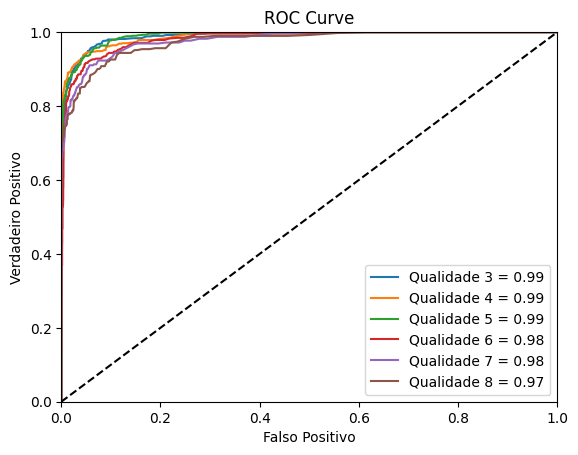

In [ ]:
# Escolhe o melhor modelo com base no ROC AUC (Como a probabilidade pode mudar a depender dos parametros e execução, vamos tratar cada caso)
best_model_name = results_df.loc[results_df['ROC AUC'].idxmax()]['Model']
print(f"O melhor modelo é: {best_model_name}")

# Otimizar os parâmetros do melhor modelo com parametros considerados comuns
if best_model_name == 'Random Forest':
    best_model = RandomForestClassifier()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'SVM':
    best_model = SVC(probability=True)
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    }
elif best_model_name == 'KNN':
    best_model = KNeighborsClassifier()
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
elif best_model_name == 'Gradient Boosting':
    best_model = GradientBoostingClassifier()
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }
elif best_model_name == 'AdaBoost':
    best_model = AdaBoostClassifier()
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }

#Usando Kfold para o modelo ficar ainda mais robusto
kfold = KFold(n_splits=5)

grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=kfold, scoring='roc_auc_ovr')
grid_search.fit(X_train, y_train)

# Melhor modelo otimizado
best_model = grid_search.best_estimator_

# Treinar o melhor modelo otimizado
best_model.fit(X_train, y_train)
predictions = best_model.predict_proba(X_test)

# Plotar gráfico da ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calcular ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar ROC Curve(Que é o gráfico solicitado usando ROC AUC)
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Qualidade {i+3} = {roc_auc[i]:0.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Após todos seus esforços, o amado chefe lhe pediu para utilizar um algoritmo de classificação que ele ouviu falar, criado pelo matemático inglês Thomas Bayes. Cabe a você, mais uma vez aplicar o algoritmo e apresentar os resultado. Em seguida, faça uma breve explicação do principal problema desse método para solucionar problemas complexos.  

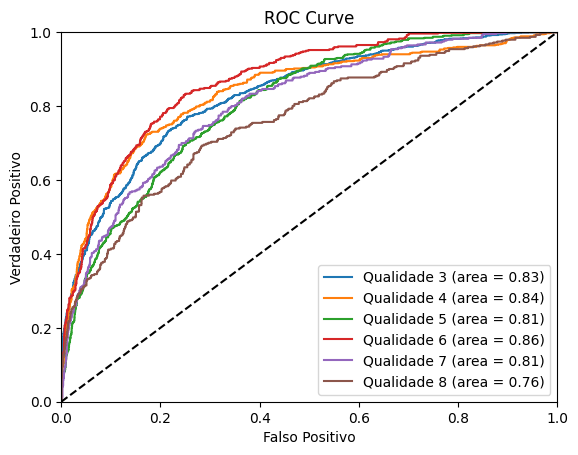

In [ ]:
#Algoritmo de classificação, criado pelo matemático inglês Thomas Bayes
model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
prob_predictions = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, prob_predictions, multi_class='ovr')

# Plotar gráfico da ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], prob_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
class_labels = np.unique(y_test)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Qualidade {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Explicação
#### Naive Bayes é rápido e eficaz para problemas simples com variáveis independentes, algoritmos como Random Forest, SVM, KNN, AdaBoost e Gradient Boosting são mais robustos e versáteis para capturar relações não lineares e lidar com a alta dimensionalidade dos dados, tornando-os mais adequados para problemas complexos.

Dr. Anton Ego marcou uma data para comparecer na vinícula e degustar seus melhores rótulos. Nascido na França e o enólogo mais famoso do mundo, Anton era temido pelas suas análises minuciosas e certeiras. As críticas eram tão serveras que tão severas que 80% das vinículas eram fechadas pela falta de aceitação do mercado. Apenas =~ 19.99% sobreviviam sem danos consideráveis e somente $0.1x10^{-15}$% se tornavam uma lenda.

Chuck tomava leite da papoula para suportar tamanha disruptura emocional. Sir.Donald, tomado pela a ansiedade, estava com seus pruridos mentais em Nárnia até que sua esposa, Srta.Audrey Hepburn assumiu a liderança do projeto com a serenidade de um bebê.

Primeiramente ordenou que todos os vinhos que já vinham há algum tempo em processo de envelhecimento em barricas de carvalho fossem engarrafados e que amostras de todos fossem coletadas para análise.

Sua maior preocupação é que somente sejam servidos os vinhos de nota oito ou nove, pois ambos são de mesmíssima qualidade, ficando a avaliação a critério da subjetividade palatal do degustador. Em **<u>hipótese nenhuma</u>** um vinho que não tenha tais notas pode ser servido.

De todas as novas garrafas, serão servidas somente três que você autorizar. O Dr. Ego só toma vinho tinto!


Sabendo que você já tinha um modelo validado para solucionar este tipo de problema, pediu que o usasse com a base **'desafio.csv''**. Ao fim, crie uma célula e copie os 3 vinhos que escolheu para registrar sua resposta.


In [ ]:
# Carrega a base desafio e verificando se a base está boa para ser usada
df = pd.read_csv('desafio.csv')

df.describe()

,Unnamed: 0,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,13890.000000,13879.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000,13890.000000
mean,7007.779554,6942.335255,9.183136,0.736765,0.864733,42.571909,0.230143,98.123479,255.784594,1.020011,3.462496,1.225645,11.551306,3.508279
std,4043.085311,4012.477367,2.334768,0.436806,0.444711,18.209972,0.164450,85.191634,96.723846,0.013742,0.396604,0.546302,1.311849,0.910398
min,0.000000,0.000000,4.006593,0.080167,0.001014,0.639725,0.010456,1.159708,7.067807,0.987461,2.720016,0.220686,8.283208,3.000000
25%,3508.250000,3469.500000,7.348581,0.334671,0.497329,28.821425,0.091691,25.583053,189.919597,1.009258,3.121992,0.748908,10.542264,3.000000
50%,7010.500000,6939.000000,9.073868,0.702384,0.902343,46.819185,0.191122,68.950035,273.611545,1.022021,3.537253,1.280815,11.544279,3.000000
75%,10508.750000,10408.500000,10.911570,1.116403,1.243669,58.720907,0.343028,159.261825,334.284755,1.032324,3.822737,1.730888,12.551839,4.000000
max,14010.000000,14267.000000,15.765792,1.573510,1.657592,65.794790,0.610848,288.988460,431.659030,1.038977,4.009454,1.999921,14.771405,9.000000


In [ ]:
print(df.isnull().sum())
for coluna in df.columns:
    print(f"Coluna '{coluna}':")
    print(df[coluna].unique())
    print("\n")

Unnamed: 0               0
index                   11
fixed acidity            0
volatile acidity         0
citric acid              0
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64
Coluna 'Unnamed: 0':
[    0     1     2 ... 10476 10776 12945]


Coluna 'index':
[13405. 13245.  4760. ... 11871.  3106.    nan]


Coluna 'fixed acidity':
[ 7.482429   6.2367315  8.680564  ...  7.6186748  8.169376  10.272214 ]


Coluna 'volatile acidity':
[1.4148539  0.5372176  1.2462809  ... 0.19927189 1.3213027  1.1267905 ]


Coluna 'citric acid':
[1.2190421  0.3013092  0.9988895  ... 1.0078453  0.70955086 0.76103294]


Coluna 'residual sugar':
[ 9.28363  61.580204 39.74747  ... 62.15199  47.448914 17.67502 ]


Coluna 'chlorides':
[0.4809588  0.16575934 0.3817159  ... 0.17129447 0.43417835 0.57342815

In [ ]:
print(df.dtypes)
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

Unnamed: 0                int64
index                   float64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [ ]:
df['quality'] = df['quality'].astype(int)
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
#Meu alvo são as predições de qualidade 8 e 9, e probabilidade de ser 8 ou 9, esse conjunto de dados me dá 11 amostras dos meus alvos
#entre mais de 13 mil amostras, existem tecnicas para tentar minimizar o problema que isso significa numa predição, mas nenhuma delas
#vai passar uma predição confiavel por conta da quantidade quase nula de amostras 8 e 9, principalmente se comparada as demais amostras.
df['quality'].value_counts()

quality
3    9646
4    2353
5    1224
6     425
7     231
8       6
9       5
Name: count, dtype: int64

In [ ]:
X = df.drop('quality',axis=1)
y = df.loc[:,'quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
#Segundo resultados passados e de acordo com o desafio, o modelo validado seria o randomForest, aqui ainda estamos tentando balancear passando
#class_width=balanced, para tentar minimizar o problema de amostras 8 e 9 em quantidades quase nulas
model = RandomForestClassifier(class_weight="balanced")
model.fit(X_train, y_train)
predictions = model.predict(X_test)
prob_predictions = model.predict_proba(X_test)

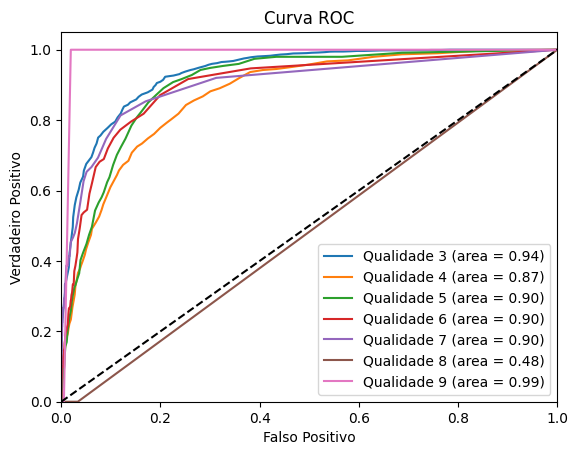

In [ ]:
# Plotar gráfico da ROC AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Calcular ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], prob_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar ROC Curve
plt.figure()
class_labels = np.unique(y_test)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Qualidade {class_labels[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 327, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 566, in roc_auc_score
    return _multiclass_roc_auc_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 683, in _multiclass_roc_auc_score
    raise ValueError(
ValueError: Number of classes in y_

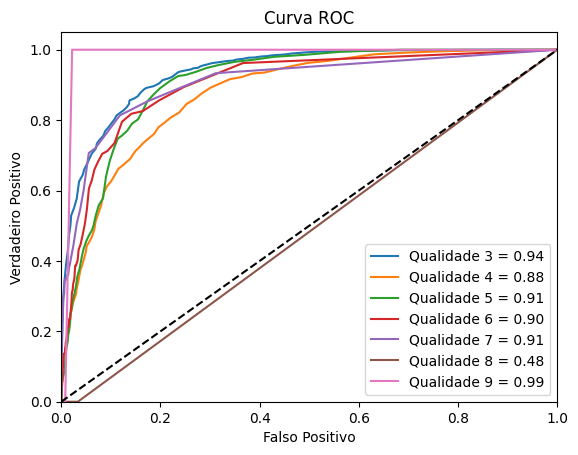

In [ ]:
#Tentar obter o melhor modelo possível
best_model = RandomForestClassifier(class_weight="balanced")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

kfold = KFold(n_splits=5)

grid = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=kfold, scoring='roc_auc_ovr')
grid.fit(X_train, y_train)

model_op = grid.best_estimator_

model_op.fit(X_train, y_train)
predictions = model_op.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Qualidade {i+3} = {roc_auc[i]:0.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
classe_5_index = np.where(model_op.classes_ == 5)[0][0]
classe_6_index = np.where(model_op.classes_ == 6)[0][0]
classe_7_index = np.where(model_op.classes_ == 7)[0][0]
classe_8_index = np.where(model_op.classes_ == 8)[0][0]
classe_9_index = np.where(model_op.classes_ == 9)[0][0]

# Obter previsões de probabilidade
predictions_classe_5 = predictions[:, classe_5_index]
predictions_classe_6 = predictions[:, classe_6_index]
predictions_classe_7 = predictions[:, classe_7_index]
predictions_classe_8 = predictions[:, classe_8_index]
predictions_classe_9 = predictions[:, classe_9_index]
predictions_classe_8_9 = predictions[:, classe_8_index] + predictions[:, classe_9_index]

# Prever a classe mais provável
predicted_classes = model_op.predict(X_test)

# Criar um DataFrame
predictions_df = pd.DataFrame({
    'Probabilidade_Quality_5': predictions_classe_5,
    'Probabilidade_Quality_6': predictions_classe_6,
    'Probabilidade_Quality_7': predictions_classe_7,
    'Probabilidade_Quality_8': predictions_classe_8,
    'Probabilidade_Quality_9': predictions_classe_9,
    'Probabilidade_Quality_8_9': predictions_classe_8_9,
    'quality': predicted_classes
})

# Adicionar as colunas originais
X_test_df = pd.DataFrame(X_test, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                                          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                                          'pH', 'sulphates', 'alcohol'])

# Concatenar as previsões com os dados originais
predictions_df = pd.concat([X_test_df.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

# Exibir o DataFrame
predictions_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Probabilidade_Quality_5,Probabilidade_Quality_6,Probabilidade_Quality_7,Probabilidade_Quality_8,Probabilidade_Quality_9,Probabilidade_Quality_8_9,quality
0,10.288143,1.197111,0.739261,37.576504,0.394073,138.930570,349.08453,0.998995,3.754743,0.696086,9.919830,0.03,0.03,0.00,0.0,0.01,0.01,3
1,9.378990,0.522645,1.460281,23.446750,0.045556,6.808189,225.96788,1.023364,3.055254,1.974770,12.999036,0.01,0.00,0.02,0.0,0.00,0.00,3
2,7.790795,1.148215,0.445589,29.015713,0.494878,193.842510,256.46265,0.999803,3.240709,0.482133,11.859146,0.29,0.07,0.05,0.0,0.04,0.04,4
3,12.737464,0.708868,0.591385,60.133790,0.153795,18.670992,400.02997,1.017895,3.536172,1.247168,10.017977,0.00,0.00,0.00,0.0,0.00,0.00,3
4,8.580186,0.541584,1.529770,15.832831,0.191928,13.998840,205.01741,1.023465,2.883539,1.966919,11.593246,0.03,0.00,0.16,0.0,0.00,0.00,3


In [ ]:
#Verificando as qualidades previstas, e como esperado, ele não iria prever qualidade 8 e 9
predictions_df['quality'].unique()

array([3, 4, 5, 6, 7])

In [ ]:
predictions_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Probabilidade_Quality_5,Probabilidade_Quality_6,Probabilidade_Quality_7,Probabilidade_Quality_8,Probabilidade_Quality_9,Probabilidade_Quality_8_9,quality
count,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000,4167.000000
mean,9.243110,0.743878,0.866734,42.311723,0.229658,96.485281,255.556385,1.019618,3.456949,1.242944,11.572321,0.089102,0.030115,0.014718,0.000456,0.000430,0.000886,3.284377
std,2.337002,0.437560,0.443830,18.219779,0.165716,85.425901,96.253276,0.013933,0.397234,0.550168,1.314306,0.123637,0.078324,0.049778,0.003018,0.003917,0.005007,0.648499
min,4.336761,0.080167,0.001975,0.687759,0.010735,1.161486,10.324275,0.987880,2.720016,0.221390,8.362004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,7.374000,0.344548,0.499017,28.349484,0.090329,23.921840,190.983855,1.008682,3.110148,0.761846,10.555675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,9.165202,0.708797,0.907131,46.606060,0.189545,66.606910,273.091770,1.021654,3.532719,1.313562,11.563041,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,11.017344,1.124169,1.244160,58.342230,0.346161,157.324575,333.583130,1.032095,3.820414,1.760992,12.567528,0.130000,0.020000,0.010000,0.000000,0.000000,0.000000,3.000000
max,15.631661,1.567977,1.657210,65.773710,0.610802,288.899480,427.922000,1.038969,4.009454,1.999845,14.672278,0.670000,0.740000,0.850000,0.080000,0.120000,0.120000,7.000000


In [ ]:
n_de_vinhos = 3

# Selecionar os 3 maiores valores da soma das probabilidades
maiores_probabilidades_8_9 = predictions_df.nlargest(n_de_vinhos, 'Probabilidade_Quality_8_9')

maiores_probabilidades_8_9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Probabilidade_Quality_5,Probabilidade_Quality_6,Probabilidade_Quality_7,Probabilidade_Quality_8,Probabilidade_Quality_9,Probabilidade_Quality_8_9,quality
3110,10.046864,0.497787,0.565553,32.219990,0.488553,140.209950,165.81699,1.016213,2.821008,0.295629,11.055837,0.07,0.09,0.01,0.00,0.12,0.12,4
3428,8.124062,1.184094,0.401821,9.489944,0.595542,140.736720,188.89360,1.018330,3.184807,0.894255,9.882525,0.20,0.06,0.01,0.00,0.09,0.09,4
33,7.801504,0.680583,0.779432,59.550533,0.213721,5.313482,292.74612,1.009273,3.652708,0.890051,10.178328,0.00,0.00,0.00,0.08,0.00,0.08,3


#Explicação
####Os 3 vinhos escolhidos são os plotados logo acima, pois têm as maiores chances de ter a qualidade no mínimo 8. A conclusão aqui é que, com um conjunto de dados com tão poucas amostras de um determinado alvo ou tipo, beira o impossível aplicar o mesmo modelo validado anteriormente (Random Forest) nessa nova base de dados desafio. O teste foi feito com a base anterior e os resultados eram entre 98% e 99% de ser qualidade 8, uma vez que não tinha amostras de qualidade 9. Neste novo modelo, a quantidade de amostras é tão pequena que beira ao mesmo de não termos nem de qualidade 8 e nem de qualidade 9.

####Podemos tomar outras abordagens que tentem mitigar o dano, como diminuir a quantidade de dados das demais quantidades, o que é basicamente descartado pelo fato de termos apenas 11 dados para lidar. Ou seja, diminuir aqui treinaria um modelo horrível. Com o Random Forest, eu tentei balancear o peso das qualidades, mas também foi em vão pela quantidade minúscula. Usar mais splits do Kfold também não me garantiu um melhor resultado que englobasse 8 e 9 na predição de qualidade. Nem usando algumas técnicas para simular qualidades 8 e 9, eu consegui alcançar resultados satisfatórios.

####Jogar 10 mil linhas de dados no lixo e considerar apenas as pequenas amostras também seria uma possibilidade, mas novamente, não treinaria um modelo bom e muito menos confiável. Se eu pudesse ignorar o fato do modelo ter que ser o validado anteriormente, tentaria outros algoritmos que talvez fizessem mais sentido, mas sem garantia alguma de que de fato teria resultados bons e confiáveis.



### Modelos não Supervisionados

**Utilize o dataset 'wines.csv' e 'wines_splines.csv'**

Chuck Norris tem um amigo famoso no mundo da ciência de dados, seu nome é Rocky Balboa. Em uma conversa sobre alguns métodos que podem ser utilizados para criar novos vetores (_features engineering_), o Sr.Rocky propôs que fossem utilizados Splines. Completamente emocionado com a ideia, Chuck decidiu aplicar esta técnica utilizando até a oitava potência.

Ele pediu a você que fizesse um estudo comparativo utilizando o PCA. O intuito é analisar se a redução de dimensionalidade pode ser vantajosa para o dataset original e o dataset com Splines.

1- Compare a variância explicada de cada um dos datasets

2- Explique porque o PCA seria, ou não uma boa abordagem para o dataset com Splines. Ademais, discorra sobre a influência de ruídos.

3- Utilize um loop "for" e crie uma condição para que, quando a variância for maior do que 0.92, seja retornado o número de features totais, faça para ambos datasets.

In [ ]:
df_wines = pd.get_dummies(pd.read_csv('wines.csv'))
df_wines_splines =pd.get_dummies(pd.read_csv('wines_splines.csv'))

scaler = StandardScaler()
df_wines_scaled = scaler.fit_transform(df_wines)
df_wines_splines_scaled = scaler.fit_transform(df_wines_splines)

pca_wines = PCA()
pca_wines.fit(df_wines_scaled)
pca_wines_splines = PCA()
pca_wines_splines.fit(df_wines_splines_scaled)

explained_variance_wines = pca_wines.explained_variance_ratio_
explained_variance_wines_splines = pca_wines_splines.explained_variance_ratio_

print(f"Variância explicada - Wines: \n{explained_variance_wines}")
print(f"\nVariância explicada - Wines Splines:\n{explained_variance_wines_splines}")

Variância explicada - Wines: 
[3.36615258e-01 1.90411067e-01 1.17257191e-01 7.78626044e-02
 6.12494571e-02 4.72473426e-02 4.18169891e-02 3.75825243e-02
 3.42815832e-02 2.30533416e-02 1.98708837e-02 1.09898635e-02
 1.76189508e-03 1.44161242e-33]

Variância explicada - Wines Splines:
[2.32843083e-01 1.05150097e-01 8.05249344e-02 7.51919659e-02
 7.06092165e-02 6.99254857e-02 6.98236270e-02 6.97753677e-02
 5.56432850e-02 3.89610558e-02 3.21142136e-02 2.44403696e-02
 1.52151051e-02 1.41589147e-02 1.24803774e-02 1.22016656e-02
 7.74384816e-03 6.39410505e-03 3.56996355e-03 1.39975501e-03
 9.56604423e-04 5.41430212e-04 2.11351245e-04 5.96357170e-05
 4.47580091e-05 1.24813879e-05 4.70878553e-06 2.53618515e-06
 5.18898249e-08 3.46651967e-09 2.01831433e-09 1.82540416e-10
 5.89598547e-11 4.59202014e-32 3.53687998e-33 2.48197619e-33
 1.67859779e-33 1.10829977e-33 8.68801132e-34 8.68801132e-34
 8.68801132e-34 8.68801132e-34 8.68801132e-34 8.68801132e-34
 8.68801132e-34 8.68801132e-34 8.68801132e-34 

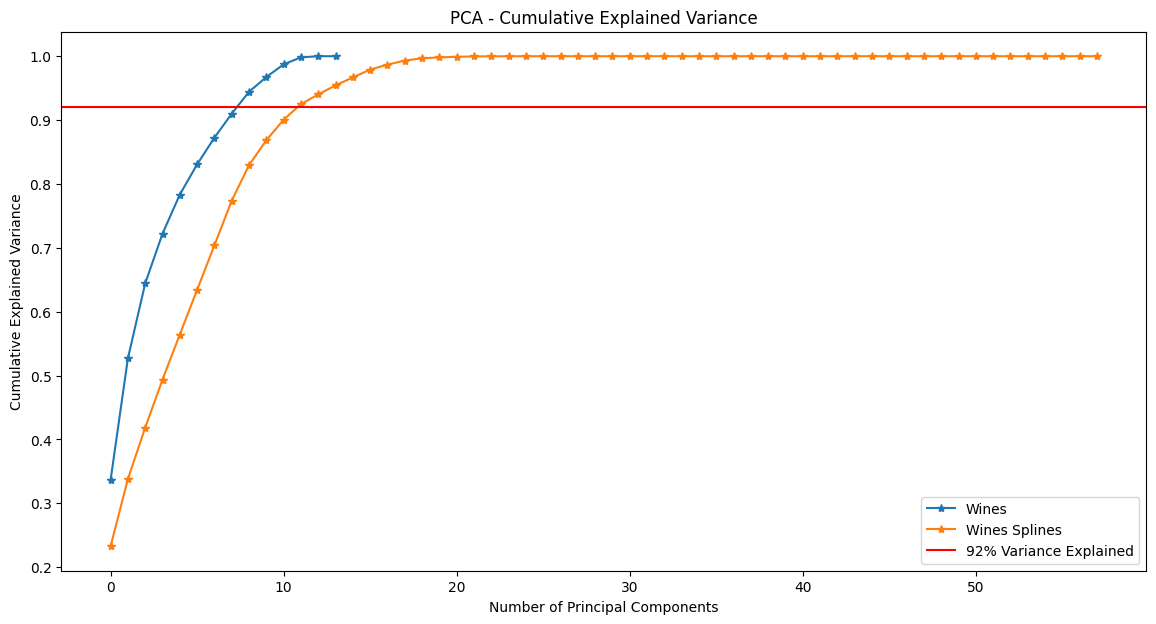

In [ ]:
cumulative_variance_wines = explained_variance_wines.cumsum()
cumulative_variance_wines_splines = explained_variance_wines_splines.cumsum()

plt.figure(figsize=(14, 7))


plt.plot(cumulative_variance_wines, label='Wines', marker='*')
plt.plot(cumulative_variance_wines_splines, label='Wines Splines', marker='*')

plt.axhline(y=0.92, color='r', linestyle='-', label='92% Variance Explained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()

plt.show()

#Explicação
####O PCA é uma abordagem recomendada para datasets com Splines devido à sua capacidade de capturar e reduzir a variância dos dados de forma eficiente, mas temos que considerar e mitigar a influência de ruídos para garantir que a redução de dimensionalidade pelo PCA resulte em uma representação fiel dos dados subjacentes.

In [ ]:
def num_componentes(explained_variance, threshold=0.92):
    cumulative_variance = 0
    for i, variance in enumerate(explained_variance):
        cumulative_variance += variance
        if cumulative_variance >= threshold:
            return i + 1
    return len(explained_variance)


num_components_wines = num_componentes(explained_variance_wines)
num_components_wines_splines = num_componentes(explained_variance_wines_splines)

print("\nNúmero de componentes para explicar >92% da variância - Wines:", num_components_wines)
print("Número de componentes para explicar >92% da variância - Wines Splines:", num_components_wines_splines)


Número de componentes para explicar >92% da variância - Wines: 9
Número de componentes para explicar >92% da variância - Wines Splines: 12


**Utilize o dataset 'wines.csv'**

Uma ideia realmente interessante é a clusterização. Por vezes, podemos nos espantar com certos resultados. Aqui, você deve utilizar o dataset original e separar cada nota em um cluster.

1- Validar os resultados do algoritmo Kmeans com o dataset original

2- Aplicar o método do Cotovelo e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

3- Utilizar o método da Silhueta e averiguar se o número de clusters apontados são iguais ao número de cluster que você tem de usar.

4- Explique os principais conceitos dos métodos das questões 2 e 3.

In [ ]:
wines = pd.read_csv('wines.csv')
X = pd.get_dummies(wines)

X = X.drop(columns=['quality'])
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)

kmns = KMeans(n_clusters=3, random_state=35)
clusters = kmns.fit_predict(scaler_x)

wines['clusters'] = clusters
wines.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,white,6.6,0.42,0.33,2.8,0.034,15.0,85.0,0.99000,3.28,0.51,13.4,6,1
1,red,6.9,0.63,0.02,1.9,0.078,18.0,30.0,0.99712,3.40,0.75,9.8,5,2
2,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3,white,6.7,0.11,0.34,8.8,0.043,41.0,113.0,0.99620,3.42,0.40,9.3,7,0
4,white,7.1,0.20,0.34,16.0,0.050,51.0,166.0,0.99850,3.21,0.60,9.2,6,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

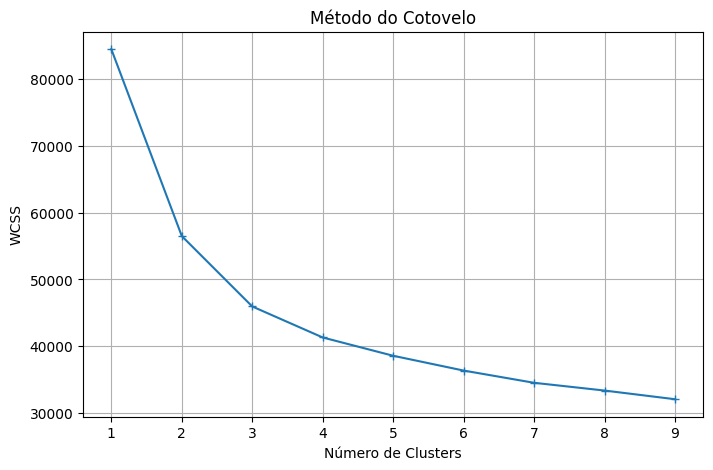

In [ ]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaler_x)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='+')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

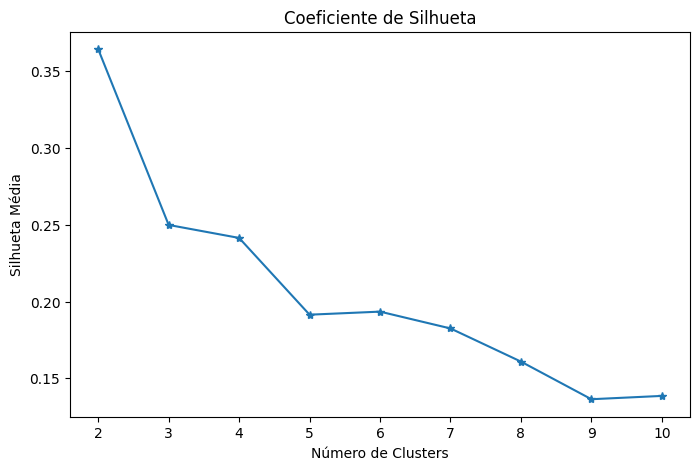

In [ ]:
#--------------- > Silhueta:
silhueta_ = []
for clusters_ in range(2, 11):
    kmeans = KMeans(n_clusters=clusters_, random_state=42)
    kmeans.fit(df_wines_scaled)
    silhueta_.append(silhouette_score(df_wines_scaled, kmeans.labels_))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhueta_, marker='*')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhueta Média')
plt.show()


melhor_CoteveloCluester = np.argmax(np.diff(wcss)) + 2
melhor_SilhuetaCluester = np.argmax(silhueta_) + 2


# Explicação:
####O método do cotovelo ajuda a escolher o número de clusters de forma antecipada, buscando um equilíbrio entre a complexidade do modelo e a qualidade do agrupamento. O ponto de cotovelo representa o ponto em que a adição de mais clusters começa a oferecer retornos quase insignificantes, indicando que os clusters adicionais podem não ser tão significativos.

####Já o método Silheuta, avalia a consistência dos clusters medindo o quão semelhante um ponto é ao seu próprio cluster em comparação com outros clusters. A pontuação da silhueta (silhouette score) varia de -1 a 1, onde valores mais altos indicam que os pontos estão bem agrupados.

**Utilize o dataset 'logs_firewall.xlsx'**

A Università di Bologna tem cursos de graduação e pós graduação em enologia. Os grandes enólogos do mundo são os únicos que podem fazer o doutorado nesta renomada universidade. Esta instituição tem um contrato milionário com o Sr.Donald, onde todos os alunos poderiam comparecer uma semana a cada três meses para estudar as características, mecânicas de plantações, tecnologias, processos de confecção dos vinhos, entre outras matérias. Todos os professores, escanções extremamente bem conceituados, sempre estão presentes.

Caso infortúnio, O Sr.Hafþór Júlíus Björnsson, mais conhecido como "o Montanha", chefe de segurança cibernética da empresa apertou o botão DEFCON-1 ao perceber que os servidores tinham sido 'hackeados'. Momento em que notou que os bancos de dados que continham as notas dos vinhos haviam sido alterados/deletados e o backup infectado por um Ransomware chamado "HUE HUE HUE BR". Aparentemente, os black-hats conseguiram alterar de 5% a 25% dos dados referentes aos vinhos tintos, antes que o Montanha conseguisse exterminar as conexões dos servidores.

O Sr.Donald Shelby aproximou-se para falar com você sobre as políticas da empresa, criadas por sua esposa, que dispunham sobre o bem estar, ambiente não tóxico, agregação dos "colaboradores" ~pseudo escravos~ como familiares, dentre outros ideais da mesma seara. Em seguida incorporou o espírito de Don Corleone e proferiu uma de suas máximas ao falar "Política é saber a hora de puxar o gatilho".   

Uma regra clara da empresa dispõe sobre a impossibilidade de extrair datasets como arquivos e, toda vez que for utilizar os dados no Jupyter Notebook, deve ser realizado uma query no datalake. Ocorre que, 'sem querer querendo', você estava "desatento" e salvou os dados para estudos quando estivesse em casa. Nítido que se disse-se que havia copiado quaisquer dados seria torturado, por isso não poderia simplesmente colocá-los de volta no banco e, como não queria morrer, tinha de encontrar vias oblíquas para dirimir a questão.

Erick Cartman, analista de infraestrutura, recebeu ordens para recuperar os dados a qualquer custo e, caso falhasse, seria devidamente penalizado ~executado~. Desolado, regado a fanta uva, com palavras arrastadas e chiadas, Erick lhe pediu ajuda. Com muita pena, pegou seu disquete que continha a cópia dos dados e o entregou, pedindo extrema confidencialidade.

Para sua surpresa, após ter a vida salva, receber aumentos salariais e bonificações, Erick te chantageou. "Agora pediram para eu analisar os logs do firewall que contém informações de acesso a servidores e descobrir os possíveis culpados. Eu não sei fazer isso não, 'ocê tá LOUKO'. Dá teus pulos aí se não eu te conto que você copia dados da empresa!!!"

Conhecedor de diversas técnicas para detecção de outliers, se lembrou de uma que já tinha experiência: Isolation Forest.

1- Descubra o nome do responsável pelo o ataque.

**ps**: Recentemente houve um estudo estatístico que comprovou que existe um fator de risco em relação aos horários de acesso, são eles:  

Entre 09:00 às 12:00 o risco varia entre 0-10%

Entre 12:00 às 14:00 o risco varia entre 5-10%

Entre 14:00 às 19:00 o risco varia entre 0-10%

Entre 19:00 às 21:00 o risco varia entre 20-30%

Entre 21:00 às 23:00 o risco varia entre 40-50%

Entre 00:00 às 02:00 o risco varia entre 60-80%

Entre 02:00 às 06:00 o risco varia entre 80-100%

Entre 06:00 às 09:00 o risco varia entre 30-40%

**<u>Esse fator pode ser recriado usando o método 'random.uniform', com 'seed' = 64.</u>**

In [ ]:
dados = pd.read_excel("logs_firewall.xlsx")

#Selecionar o que suponho que são horas e minutos
dados_selecionados = dados[['H', 'M']]

#Definir os intervalos de tempo em horas e minutos e os respectivos fatores de risco em intervalos
intervalos_tempo = [
    ((9, 0), (12, 0), (0, 0.1)),
    ((12, 0), (14, 0), (0.05, 0.1)),
    ((14, 0), (19, 0), (0, 0.1)),
    ((19, 0), (21, 0), (0.2, 0.3)),
    ((21, 0), (23, 0), (0.4, 0.5)),
    ((0, 0), (2, 0), (0.6, 0.8)),
    ((2, 0), (6, 0), (0.8, 1.0)),
    ((6, 0), (9, 0), (0.3, 0.4))
]

#Função para gerar os fatores de risco com base na hora e nos minutos
def gerar_fator_risco(hora, minuto):
    for (hora_inicio, minuto_inicio), (hora_fim, minuto_fim), (baixo, alto) in intervalos_tempo:
        if (hora_inicio < hora < hora_fim) or (hora_inicio == hora and minuto_inicio <= minuto) or (hora_fim == hora and minuto < minuto_fim):
            np.random.seed(64)
            return np.random.uniform(baixo, alto)
    return 0

#Adicionar a coluna de fator de risco ao conjunto de dados
dados['Fator_Risco'] = dados.apply(lambda linha: gerar_fator_risco(linha['H'], linha['M']), axis=1)

dados_selecionados_com_risco = dados[['H', 'M', 'Fator_Risco']]

#Função para aplicar Isolation Forest com diferentes níveis de contaminação (Respeitando o que foi informado em sala, da contaminação nunca passar de 50% e tentar fazer com contaminações diferentes
#e pegando a menor quantidade de outliers possível)
def encontrar_outliers_minimos(dados, inicio=0.01, fim=0.49, passo=0.01):
    melhor_contaminacao = inicio
    menor_numero_outliers = len(dados)
    melhor_outliers = None

    contaminacao = inicio
    while contaminacao <= fim:
        modelo = IsolationForest(contamination=contaminacao, random_state=64)
        modelo.fit(dados)
        previsoes = modelo.predict(dados)
        outliers = dados[previsoes == -1]
        numero_outliers = len(outliers)

        if numero_outliers < menor_numero_outliers and not outliers.empty:
            menor_numero_outliers = numero_outliers
            melhor_contaminacao = contaminacao
            melhor_outliers = outliers

        contaminacao += passo

    return melhor_outliers, melhor_contaminacao

outliers_minimos_com_risco, melhor_contaminacao_com_risco = encontrar_outliers_minimos(dados_selecionados_com_risco, inicio=0.005, fim=0.49, passo=0.005)

# Recuperar os detalhes completos dos outliers no conjunto de dados original
indices_outliers_com_risco = outliers_minimos_com_risco.index
detalhes_outliers_com_risco = dados.loc[indices_outliers_com_risco, ['Nome', 'Maquina', 'H', 'M', 'Fator_Risco']]

print(detalhes_outliers_com_risco)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names

/usr/local/lib/python3

                           Nome         Maquina  H   M  Fator_Risco
73   hanskelsen@empresax.COM.BR         HYPERV$  5   4      0.87582
103  hanskelsen@empresax.COM.BR         HYPERV$  5   4      0.87582
178  hanskelsen@empresax.COM.BR  empresaxWKS05$  2   1      0.87582
406      mutley@empresax.COM.BR         HYPERV$  2   4      0.87582
629  hanskelsen@empresax.COM.BR  empresaxWKS05$  0  56      0.67582
754  hanskelsen@empresax.COM.BR         HYPERV$  1   1      0.67582


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



#Explicação
####O responsável pelo e-mail hanskelsen@empresax.COM.BR não só aparece mais vezes com comportamento "fora do comum" como também em horário de mais risco, julgando ser apenas um culpado pela maneira que a questão foi abordada, ele seria o mais provável, mas se tivesse a possiblidade de apontar 2, o mutley@empresax.COM.BR também seria um potencial suspeito a ser investigado.

####Lembrando que independente do resultado do algoritmo, obviamente tem de ser investigado, o algoritmo determina apenas suspeitos em potencial, com mais informações sobre regras da empresa de acessos, limites de acesso e horário que cada funcionário trabalha, poderiamos até descartar um desses suspeitos ou ter suspeitas ainda mais fortes sob um deles ou os dois.